In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def load(name):
    data = pd.read_table(name, 
                         sep=':', 
                         names=["Thread", "Interval", "Latency"], 
                         nrows=41289000, #41289829
                         skiprows=6)

    print(data)
    return data

In [3]:
def vals(data):
    lat = data["Latency"]
    return {"Min": lat.min(), "Avg": lat.mean(), "Max": lat.max(), "Std": lat.std()}

In [4]:
colors = ["#696969", "#FFA07A"]
sns.set_palette(sns.color_palette(colors))

bins = 100

def save(plot, name):
    fig = plot.get_figure()
    fig.savefig("images/"+name, dpi=600)

def draw_hist(data):
    plot = sns.histplot(data=data, 
                         x="Latency",
                         bins=bins,
                         log_scale=[False, True],
                         color=colors[0])
    plot.set_xlabel("Latency (μs)")
    return plot

In [5]:
data_custom = load("cyclictest_custom.txt")
plot_custom = draw_hist(data_custom)
# save(plot_custom, "custom_%i.png"%bins)

/tmp/ipykernel_65386/752900790.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(name,


         Thread  Interval  Latency
0             0         0       25
1             0         1        5
2             0         2        6
3             0         3        7
4             0         4        7
...         ...       ...      ...
41288995      2   3260166       12
41288996      2   3260167       11
41288997      2   3260168        9
41288998      2   3260169       14
41288999      2   3260170       22

[41289000 rows x 3 columns]


In [6]:
data_rt = load("cyclictest_rt.txt")
plot_rt = draw_hist(data_rt)
# save(plot_rt, "rt_%i.png"%bins)

          Thread  Interval  Latency
0              0         0       10
1              0         1       13
2              0         2       24
3              0         3       11
4              0         4       14
...          ...       ...      ...
41288995       1   5069006        5
41288996       1   5069007        6
41288997       1   5069008        5
41288998       1   5069009        5
41288999       1   5069010       13

[41289000 rows x 3 columns]


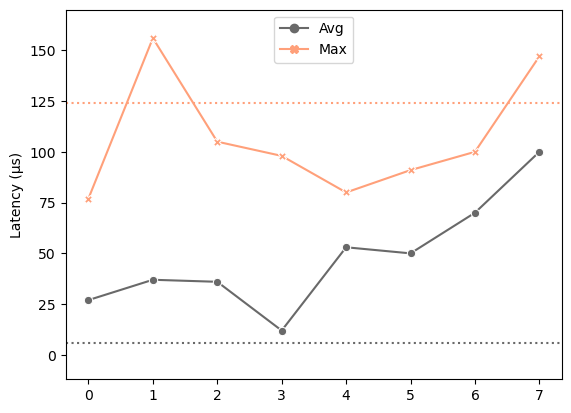

In [63]:
adam = np.array([("EMLID", "RPi1", 27, 77), ("Durr", "RPi1", 37, 156), ("Benway", "RPi1", 36, 105), \
                 ("Molloy", "RPi2", 12, 98), ("Adam", "RPi3", 53, 80), ("Balci", "RPi3", 50, 91), \
                 ("Autostatic", "RPi3", 70, 100), ("Riva", "RPi3", 100, 147)],
                dtype=[("Author", "str"), ("RPi", "str"), ("Avg", "i4"), ("Max", "i4")])

plot_adam = sns.lineplot(data=adam, markers=True, dashes=False)
plot_adam.set_ylabel("Latency (μs)")
plot_adam.axhline(5.9, color=colors[0], linestyle=":")
plot_adam.axhline(124, color=colors[1], linestyle=":")
plot_adam.set(ylim=(-12,170))

# save(plot_adam, "other_studies1.png")

In [54]:
v = vals(data_rt)
our_avg = v["Avg"]
our_max = v["Max"]

adam_data = {"Author": ["Our", "EMLID", "Durr", "Benway", "Molloy", "Adam", "Balci", "Autostatic", "Riva"],
             "RPi": ["RPi5", "RPi1", "RPi1", "RPi1", "RPi2", "RPi3", "RPi3", "RPi3", "RPi3"], \
             "Avg": [our_avg, 27, 37, 36, 12, 53, 50, 55, 100], \
             "Max": [our_max, 77, 156, 105, 98, 80, 91, 100, 147]}
adam = pd.DataFrame(data=adam_data).melt(id_vars="Author", value_vars=["Avg","Max"])
adam

,Author,variable,value
0,Our,Avg,5.912652
1,EMLID,Avg,27.000000
2,Durr,Avg,37.000000
3,Benway,Avg,36.000000
4,Molloy,Avg,12.000000
5,Adam,Avg,53.000000
6,Balci,Avg,50.000000
7,Autostatic,Avg,55.000000
8,Riva,Avg,100.000000
9,Our,Max,124.000000


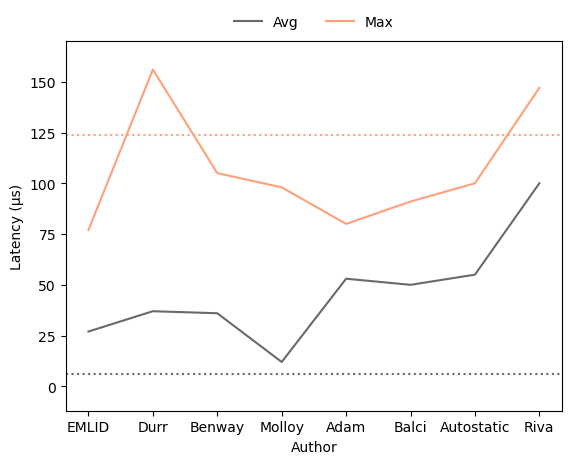

In [59]:
plot_adam = sns.lineplot(data=adam[adam["Author"] != "Our"], x="Author", y="value", hue="variable", markers=True, dashes=False)
plot_adam.set_ylabel("Latency (μs)")
plot_adam.axhline(our_avg, color=colors[0], linestyle=":")
plot_adam.axhline(our_max, color=colors[1], linestyle=":")
plot_adam.set(ylim=(-12,170))
sns.move_legend(
    plot_adam, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title=None, frameon=False,
)

# save(plot_adam, "other_studies2.png")

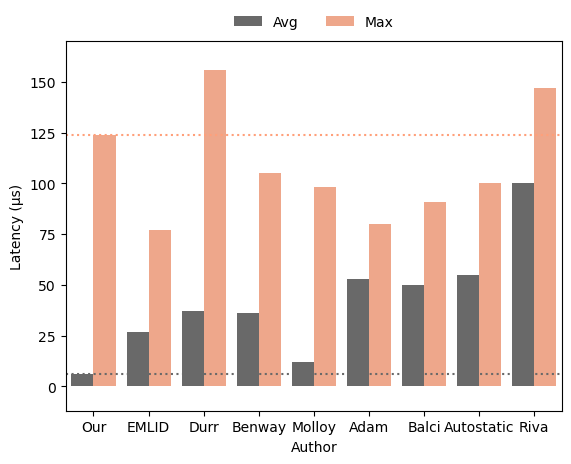

In [61]:
plot_adam = sns.barplot(data=adam, x="Author", y="value", hue="variable")
plot_adam.set_ylabel("Latency (μs)")
plot_adam.axhline(our_avg, color=colors[0], linestyle=":")
plot_adam.axhline(our_max, color=colors[1], linestyle=":")
plot_adam.set(ylim=(-12,170))
sns.move_legend(
    plot_adam, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title=None, frameon=False,
)

# save(plot_adam, "other_studies3.png")